In [24]:
# Data manipulation and numerical operations
import pandas as pd
import numpy as np
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Preprocessing, splitting, and scaling
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Regression and Classification Models
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import pickle

Making a mini model for presentation

In [25]:
# ext_questions = {'EXT1' : 'I am the life of the party',
#                  'EXT2' : 'I dont talk a lot',
#                  'EXT3' : 'I feel comfortable around people',
#                  'EXT4' : 'I keep in the background',
#                  'EXT5' : 'I start conversations',
#                  'EXT6' : 'I have little to say',
#                  'EXT7' : 'I talk to a lot of different people at parties',
#                  'EXT8' : 'I dont like to draw attention to myself',
#                  'EXT9' : 'I dont mind being the center of attention',
#                  'EXT10': 'I am quiet around strangers'}

# est_questions = {'EST1' : 'I get stressed out easily',
#                  'EST2' : 'I am relaxed most of the time',
#                  'EST3' : 'I worry about things',
#                  'EST4' : 'I seldom feel blue',
#                  'EST5' : 'I am easily disturbed',
#                  'EST6' : 'I get upset easily',
#                  'EST7' : 'I change my mood a lot',
#                  'EST8' : 'I have frequent mood swings',
#                  'EST9' : 'I get irritated easily',
#                  'EST10': 'I often feel blue'}

# agr_questions = {'AGR1' : 'I feel little concern for others',
#                  'AGR2' : 'I am interested in people',
#                  'AGR3' : 'I insult people',
#                  'AGR4' : 'I sympathize with others feelings',
#                  'AGR5' : 'I am not interested in other peoples problems',
#                  'AGR6' : 'I have a soft heart',
#                  'AGR7' : 'I am not really interested in others',
#                  'AGR8' : 'I take time out for others',
#                  'AGR9' : 'I feel others emotions',
#                  'AGR10': 'I make people feel at ease'}

# csn_questions = {'CSN1' : 'I am always prepared',
#                  'CSN2' : 'I leave my belongings around',
#                  'CSN3' : 'I pay attention to details',
#                  'CSN4' : 'I make a mess of things',
#                  'CSN5' : 'I get chores done right away',
#                  'CSN6' : 'I often forget to put things back in their proper place',
#                  'CSN7' : 'I like order',
#                  'CSN8' : 'I shirk my duties',
#                  'CSN9' : 'I follow a schedule',
#                  'CSN10' : 'I am exacting in my work'}

# opn_questions = {'OPN1' : 'I have a rich vocabulary',
#                  'OPN2' : 'I have difficulty understanding abstract ideas',
#                  'OPN3' : 'I have a vivid imagination',
#                  'OPN4' : 'I am not interested in abstract ideas',
#                  'OPN5' : 'I have excellent ideas',
#                  'OPN6' : 'I do not have a good imagination',
#                  'OPN7' : 'I am quick to understand things',
#                  'OPN8' : 'I use difficult words',
#                  'OPN9' : 'I spend time reflecting on things',
#                  'OPN10': 'I am full of ideas'}

In [26]:
df_mini = pd.read_csv('../../data/cleaned/big5_sample_cleaned.csv')
df_mini = df_mini[['EXT3', 'EXT5', 'EST1', 'EST7', 'AGR4', 'AGR8', 'CSN3', 'CSN9', 'OPN7', 'OPN9']]

In [27]:
df_mini.head()

,EXT3,EXT5,EST1,EST7,AGR4,AGR8,CSN3,CSN9,OPN7,OPN9
0,3.0,5.0,3.0,2.0,1.0,5.0,4.0,3.0,3.0,5.0
1,4.0,2.0,5.0,4.0,3.0,3.0,5.0,4.0,5.0,5.0
2,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0
3,4.0,4.0,4.0,2.0,4.0,4.0,5.0,4.0,5.0,5.0
4,3.0,2.0,1.0,1.0,3.0,3.0,1.0,1.0,5.0,4.0


In [28]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_mini)

# Confirm the standardization by checking the mean and variance of the scaled data
data_scaled_mean = data_scaled.mean(axis=0)
data_scaled_std = data_scaled.std(axis=0)

data_scaled_mean, data_scaled_std

(array([-1.47748369e-16,  4.75137928e-17, -8.75425360e-17,  7.01858993e-17,
         1.11733348e-17, -1.07177231e-16, -6.82332777e-17,  1.24750826e-16,
        -3.01246124e-16,  2.83808129e-16]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

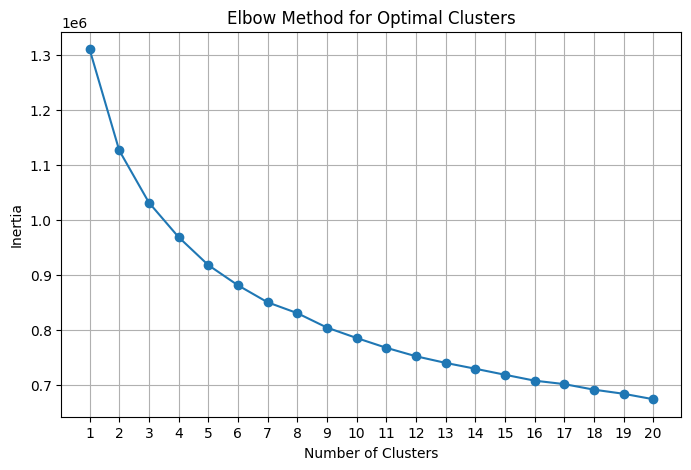

In [29]:
inertia = []
cluster_range = range(1, 21)  

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.xticks(cluster_range)
plt.grid()
plt.show()

In [30]:
kmeans = KMeans(n_clusters=9, random_state=42)
cluster_labels = kmeans.fit_predict(data_scaled)

data_with_clusters = df_mini.copy()
data_with_clusters['Cluster'] = cluster_labels


data_with_clusters.head(20)

,EXT3,EXT5,EST1,EST7,AGR4,AGR8,CSN3,CSN9,OPN7,OPN9,Cluster
0,3.0,5.0,3.0,2.0,1.0,5.0,4.0,3.0,3.0,5.0,0
1,4.0,2.0,5.0,4.0,3.0,3.0,5.0,4.0,5.0,5.0,1
2,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,1
3,4.0,4.0,4.0,2.0,4.0,4.0,5.0,4.0,5.0,5.0,8
4,3.0,2.0,1.0,1.0,3.0,3.0,1.0,1.0,5.0,4.0,5
5,5.0,5.0,2.0,4.0,5.0,5.0,3.0,4.0,4.0,4.0,8
6,3.0,3.0,2.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,2
7,3.0,2.0,3.0,2.0,5.0,5.0,3.0,2.0,5.0,5.0,5
8,4.0,4.0,5.0,5.0,4.0,4.0,5.0,4.0,4.0,4.0,8
9,3.0,5.0,3.0,2.0,4.0,4.0,5.0,4.0,5.0,5.0,4


In [31]:
data_with_clusters

,EXT3,EXT5,EST1,EST7,AGR4,AGR8,CSN3,CSN9,OPN7,OPN9,Cluster
0,3.0,5.0,3.0,2.0,1.0,5.0,4.0,3.0,3.0,5.0,0
1,4.0,2.0,5.0,4.0,3.0,3.0,5.0,4.0,5.0,5.0,1
2,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,1
3,4.0,4.0,4.0,2.0,4.0,4.0,5.0,4.0,5.0,5.0,8
4,3.0,2.0,1.0,1.0,3.0,3.0,1.0,1.0,5.0,4.0,5
...,...,...,...,...,...,...,...,...,...,...,...
130996,3.0,3.0,4.0,4.0,4.0,3.0,4.0,3.0,4.0,4.0,7
130997,3.0,1.0,1.0,1.0,1.0,1.0,5.0,1.0,5.0,5.0,0
130998,3.0,2.0,4.0,4.0,4.0,3.0,4.0,3.0,4.0,4.0,1
130999,5.0,5.0,4.0,4.0,4.0,5.0,5.0,2.0,4.0,5.0,7


C:\Users\96653\AppData\Local\Temp\ipykernel_21600\3358870135.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cluster_profiles = data_with_clusters.groupby('Cluster').apply(


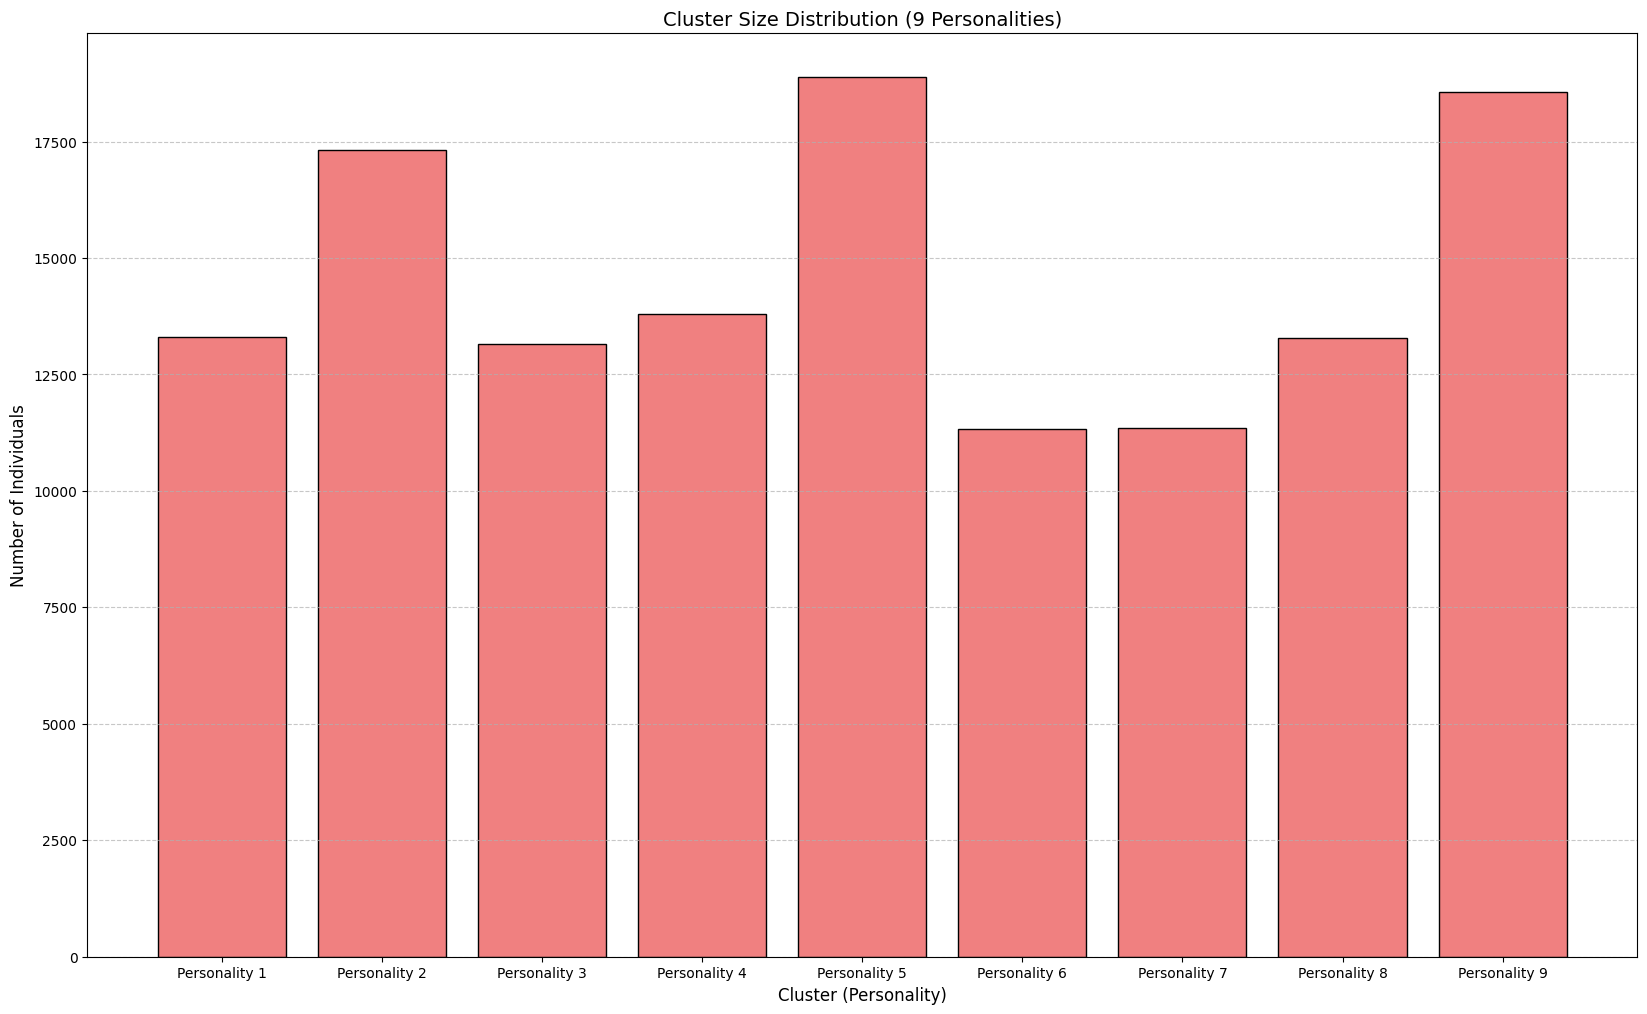

In [32]:
# Define Big Five attributes dynamically by grouping columns based on their prefixes
big5_attributes = {
    'Openness': [col for col in data_with_clusters.columns if col.startswith('OPN')],
    'Conscientiousness': [col for col in data_with_clusters.columns if col.startswith('CSN')],
    'Extraversion': [col for col in data_with_clusters.columns if col.startswith('EXT')],
    'Agreeableness': [col for col in data_with_clusters.columns if col.startswith('AGR')],
    'Neuroticism': [col for col in data_with_clusters.columns if col.startswith('EST')],
}

# Calculate Big Five traits dynamically for each cluster
cluster_profiles = data_with_clusters.groupby('Cluster').apply(
    lambda group: {
        attribute: (group[cols].mean(axis=0).mean() * 10) * 2  # Percentage out of 100
        for attribute, cols in big5_attributes.items() if all(col in group.columns for col in cols)
    }
).apply(pd.Series).reset_index()

# Add a "Personality Type" label for each cluster
cluster_profiles['Personality Type'] = [f'Personality {i+1}' for i in cluster_profiles['Cluster']]

# Analyze the distribution of clusters
cluster_counts = data_with_clusters['Cluster'].value_counts()



plt.figure(figsize=(20, 12))
plt.bar(cluster_counts.index, cluster_counts.values, color='lightcoral', edgecolor='black')
plt.title('Cluster Size Distribution (9 Personalities)', fontsize=14)
plt.xlabel('Cluster (Personality)', fontsize=12)
plt.ylabel('Number of Individuals', fontsize=12)
plt.xticks(ticks=cluster_counts.index, labels=[f'Personality {i+1}' for i in cluster_counts.index])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [33]:
cluster_profiles

,Cluster,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism,Personality Type
0,0,87.634328,73.976103,58.437664,55.960021,40.825881,Personality 1
1,1,88.494400,82.123311,44.751761,85.068699,75.807066,Personality 2
2,2,59.368493,66.681359,70.436963,70.203663,57.944373,Personality 3
3,3,66.707750,67.346480,56.353223,78.924092,76.726600,Personality 4
4,4,87.389509,82.359075,84.012597,87.499603,36.839570,Personality 5
5,5,84.349360,48.305249,72.068813,78.973974,60.389943,Personality 6
6,6,82.500000,65.157737,40.077547,49.370814,78.426154,Personality 7
7,7,89.576871,62.287306,72.049390,83.086885,73.775034,Personality 8
8,8,86.064002,86.322056,84.899257,87.304170,75.776317,Personality 9


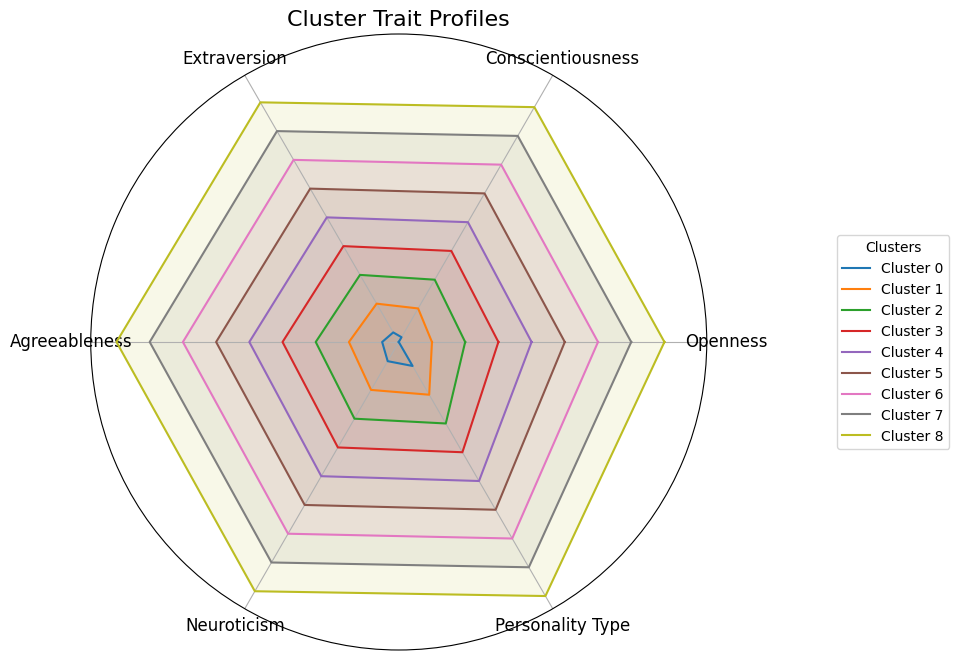

In [34]:
def plot_radar_chart(data, title): 
    categories = data.columns[1:]  
    num_categories = len(categories)

    angles = [n / float(num_categories) * 2 * np.pi for n in range(num_categories)]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(polar=True))

    for i, row in data.iterrows():
        values = row[1:].values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, label=f"Cluster {int(row['Cluster'])}")
        ax.fill(angles, values, alpha=0.1)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=12)
    ax.set_yticks([])
    plt.title(title, size=16)

    ax.legend(
        loc='center left',
        bbox_to_anchor=(1.2, 0.5),  
        fontsize=10,
        title="Clusters"
    )

    plt.show()

plot_radar_chart(cluster_profiles, "Cluster Trait Profiles")

In [35]:
data_with_clusters

,EXT3,EXT5,EST1,EST7,AGR4,AGR8,CSN3,CSN9,OPN7,OPN9,Cluster
0,3.0,5.0,3.0,2.0,1.0,5.0,4.0,3.0,3.0,5.0,0
1,4.0,2.0,5.0,4.0,3.0,3.0,5.0,4.0,5.0,5.0,1
2,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,1
3,4.0,4.0,4.0,2.0,4.0,4.0,5.0,4.0,5.0,5.0,8
4,3.0,2.0,1.0,1.0,3.0,3.0,1.0,1.0,5.0,4.0,5
...,...,...,...,...,...,...,...,...,...,...,...
130996,3.0,3.0,4.0,4.0,4.0,3.0,4.0,3.0,4.0,4.0,7
130997,3.0,1.0,1.0,1.0,1.0,1.0,5.0,1.0,5.0,5.0,0
130998,3.0,2.0,4.0,4.0,4.0,3.0,4.0,3.0,4.0,4.0,1
130999,5.0,5.0,4.0,4.0,4.0,5.0,5.0,2.0,4.0,5.0,7


In [36]:
# 
questions_list = ['I feel comfortable around people', 'I start conversations',
                   'I get stressed out easily', 'I change my mood a lot',
                     'I sympathize with others feelings', 'I take time out for others',
                     'I pay attention to details','I follow a schedule',
                     'I am quick to understand things','I spend time reflecting on things']

In [37]:
# ext_questions = {'EXT1' : 'I am the life of the party',
#                  'EXT2' : 'I dont talk a lot',
#                  'EXT3' : 'I feel comfortable around people',
#                  'EXT4' : 'I keep in the background',
#                  'EXT5' : 'I start conversations',
#                  'EXT6' : 'I have little to say',
#                  'EXT7' : 'I talk to a lot of different people at parties',
#                  'EXT8' : 'I dont like to draw attention to myself',
#                  'EXT9' : 'I dont mind being the center of attention',
#                  'EXT10': 'I am quiet around strangers'}

# est_questions = {'EST1' : 'I get stressed out easily',
#                  'EST2' : 'I am relaxed most of the time',
#                  'EST3' : 'I worry about things',
#                  'EST4' : 'I seldom feel blue',
#                  'EST5' : 'I am easily disturbed',
#                  'EST6' : 'I get upset easily',
#                  'EST7' : 'I change my mood a lot',
#                  'EST8' : 'I have frequent mood swings',
#                  'EST9' : 'I get irritated easily',
#                  'EST10': 'I often feel blue'}

# agr_questions = {'AGR1' : 'I feel little concern for others',
#                  'AGR2' : 'I am interested in people',
#                  'AGR3' : 'I insult people',
#                  'AGR4' : 'I sympathize with others feelings',
#                  'AGR5' : 'I am not interested in other peoples problems',
#                  'AGR6' : 'I have a soft heart',
#                  'AGR7' : 'I am not really interested in others',
#                  'AGR8' : 'I take time out for others',
#                  'AGR9' : 'I feel others emotions',
#                  'AGR10': 'I make people feel at ease'}

# csn_questions = {'CSN1' : 'I am always prepared',
#                  'CSN2' : 'I leave my belongings around',
#                  'CSN3' : 'I pay attention to details',
#                  'CSN4' : 'I make a mess of things',
#                  'CSN5' : 'I get chores done right away',
#                  'CSN6' : 'I often forget to put things back in their proper place',
#                  'CSN7' : 'I like order',
#                  'CSN8' : 'I shirk my duties',
#                  'CSN9' : 'I follow a schedule',
#                  'CSN10' : 'I am exacting in my work'}

# opn_questions = {'OPN1' : 'I have a rich vocabulary',
#                  'OPN2' : 'I have difficulty understanding abstract ideas',
#                  'OPN3' : 'I have a vivid imagination',
#                  'OPN4' : 'I am not interested in abstract ideas',
#                  'OPN5' : 'I have excellent ideas',
#                  'OPN6' : 'I do not have a good imagination',
#                  'OPN7' : 'I am quick to understand things',
#                  'OPN8' : 'I use difficult words',
#                  'OPN9' : 'I spend time reflecting on things',
#                  'OPN10': 'I am full of ideas'}

In [38]:
data_with_clusters

,EXT3,EXT5,EST1,EST7,AGR4,AGR8,CSN3,CSN9,OPN7,OPN9,Cluster
0,3.0,5.0,3.0,2.0,1.0,5.0,4.0,3.0,3.0,5.0,0
1,4.0,2.0,5.0,4.0,3.0,3.0,5.0,4.0,5.0,5.0,1
2,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,1
3,4.0,4.0,4.0,2.0,4.0,4.0,5.0,4.0,5.0,5.0,8
4,3.0,2.0,1.0,1.0,3.0,3.0,1.0,1.0,5.0,4.0,5
...,...,...,...,...,...,...,...,...,...,...,...
130996,3.0,3.0,4.0,4.0,4.0,3.0,4.0,3.0,4.0,4.0,7
130997,3.0,1.0,1.0,1.0,1.0,1.0,5.0,1.0,5.0,5.0,0
130998,3.0,2.0,4.0,4.0,4.0,3.0,4.0,3.0,4.0,4.0,1
130999,5.0,5.0,4.0,4.0,4.0,5.0,5.0,2.0,4.0,5.0,7


In [39]:
data_with_clusters.to_csv('../../data/cleaned/mini_data_with_clusters.csv', index=False)

In [41]:
with open('../../deployment/mini_big5_cluster_model_scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)


In [42]:
with open('../../deployment/mini_big5_cluster_model.pkl', 'wb') as file:
    pickle.dump(kmeans, file) 
    
print("Model exported successfully as 'min_big5_cluster_model.pkl'")



Model exported successfully as 'min_big5_cluster_model.pkl'
